In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [20]:
data = pd.read_csv("./wine.csv")

data.head(10)


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [21]:
Inputs = data.iloc[:,1:14]

Label = data.iloc[:,0]

Scaler = StandardScaler()

x1 = Scaler.fit(Inputs)
x2 = x1.transform(Inputs)

Inputs.count



<bound method DataFrame.count of      Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0      14.23        1.71  2.43  15.6  127     2.80        3.06   
1      13.20        1.78  2.14  11.2  100     2.65        2.76   
2      13.16        2.36  2.67  18.6  101     2.80        3.24   
3      14.37        1.95  2.50  16.8  113     3.85        3.49   
4      13.24        2.59  2.87  21.0  118     2.80        2.69   
..       ...         ...   ...   ...  ...      ...         ...   
173    13.71        5.65  2.45  20.5   95     1.68        0.61   
174    13.40        3.91  2.48  23.0  102     1.80        0.75   
175    13.27        4.28  2.26  20.0  120     1.59        0.69   
176    13.17        2.59  2.37  20.0  120     1.65        0.68   
177    14.13        4.10  2.74  24.5   96     2.05        0.76   

     Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                    0.28     2.29       5.64  1.04  3.92     1065  
1                    0.26     1.28  

In [41]:
pca = PCA()

proj = pca.fit_transform(x2)

# print(pca.explained_variance_)
# print(pca.explained_variance_ratio_) 

print(pca.components_)

[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]
 [-0.20738262  0.08901289  0.6262239   0.61208035  0.13075693  0.14617896
   0.1506819   0.17036816  0.14945431 -0.13730621  0.08522192  0.16600459
  -0.12674592]
 [-0.0178563   0.53689028 -0.21417556  0.06085941 -0.35179658  0.19806835
   0.15229479 -0.20330102  0.39905653  0.06592568 -0.42777141  0.18412074
  -0.23207086]
 [-0.26566365  0.03521363 -0.14302547  0.06610294  0.72704851 -0.14931841
  -0.10902584 -0.50070298  0.13685982 -0.07643678 -0.17361452 -0.10116099
  -0.1578688 ]
 [-0.21353865 -0.53681385 -0.15447466  0.10082451 -0.03814394  0.0841223
   0.01892002  0.25859401  0.53379539  0.41864414 -0.10598274 -0.26585107
  -0.11972557]
 [-0.05639636  0.420523

In [34]:
var = np.sum(pca.explained_variance_[0:2])
print(var)
var_percentage = np.sum(pca.explained_variance_ratio_[0:2])*100
print(var_percentage,'%')


7.243517907228712
55.406338356935294 %


In [35]:
exp_var_ratio = pca.explained_variance_ratio_

print('Explained Variance Ratios:')
for i, ratio in enumerate(exp_var_ratio):
    print(f'PC{i+1}: {ratio*100:.2f}%')


Explained Variance Ratios:
PC1: 36.20%
PC2: 19.21%


In [36]:
print('\nFeature Importance:')

for i, col in enumerate(Inputs.columns):
    print(f'{col}: {pca.components_[0][i]:.2f}')


Feature Importance:
Alcohol: 0.14
Malic.acid: -0.25
Ash: -0.00
Acl: -0.24
Mg: 0.14
Phenols: 0.39
Flavanoids: 0.42
Nonflavanoid.phenols: -0.30
Proanth: 0.31
Color.int: -0.09
Hue: 0.30
OD: 0.38
Proline: 0.29


Text(0, 0.5, 'The second principle component')

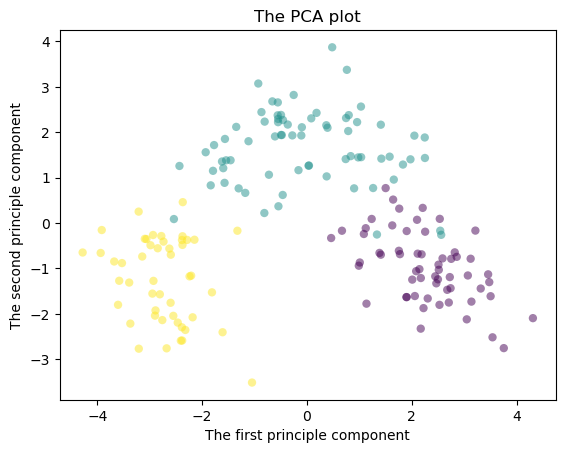

In [32]:
figure = plt.figure()
ax = plt.gca()
plt.scatter(proj[:,0],proj[:,1], c=Label, edgecolor='none', alpha=0.5)
ax.set_title("The PCA plot")
ax.set_xlabel("The first principle component")
ax.set_ylabel("The second principle component")